# Preparation

In [1]:
#import packages libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import tkinter as tk
from pandas_profiling import ProfileReport
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#import datasets
ggs0918 = pd.read_excel("GGS-RINCIANPENJUALAN-201809.xlsx")
ggs1018 = pd.read_excel("GGS-RINCIANPENJUALAN-201810.xlsx")
ggs1118 = pd.read_excel("GGS-RINCIANPENJUALAN-201811.xlsx")
ggs1218 = pd.read_excel("GGS-RINCIANPENJUALAN-201812.xlsx")
ggs0119 = pd.read_excel("GGS-RINCIANPENJUALAN-201901.xlsx")
ggs0219 = pd.read_excel("GGS-RINCIANPENJUALAN-201902.xlsx")
ggs0319 = pd.read_excel("GGS-RINCIANPENJUALAN-201903.xlsx")
ggs0419 = pd.read_excel("GGS-RINCIANPENJUALAN-201904.xlsx")
ggs0519 = pd.read_excel("GGS-RINCIANPENJUALAN-201905.xlsx")
ggs0619 = pd.read_excel("GGS-RINCIANPENJUALAN-201906.xlsx")
ggs0719 = pd.read_excel("GGS-RINCIANPENJUALAN-201907.xlsx")
ggs0819 = pd.read_excel("GGS-RINCIANPENJUALAN-201908.xlsx")
ggs0919 = pd.read_excel("GGS-RINCIANPENJUALAN-201909.xlsx")

ghi0918 = pd.read_excel("GHI RINCIAN PENJUALAN 201809.txt.xls")
ghi1018 = pd.read_excel("GHI RINCIAN PENJUALAN 201810.txt.xls")
ghi1118 = pd.read_excel("GHI RINCIAN PENJUALAN 201811.txt.xls")
ghi1218 = pd.read_excel("GHI RINCIAN PENJUALAN 201812.txt.xls")
ghi0119 = pd.read_excel("GHI RINCIAN PENJUALAN 201901.txt.xls")
ghi0219 = pd.read_excel("GHI RINCIAN PENJUALAN 201902.txt.xls")
ghi0319 = pd.read_excel("GHI RINCIAN PENJUALAN 201903.txt.xls")
ghi0419 = pd.read_excel("GHI RINCIAN PENJUALAN 201904.txt.xls")
ghi0519 = pd.read_excel("GHI RINCIAN PENJUALAN 201905.txt.xls")
ghi0619 = pd.read_excel("GHI RINCIAN PENJUALAN 201906.txt.xls")
ghi0719 = pd.read_excel("GHI RINCIAN PENJUALAN 201907.txt.xls")
ghi0819 = pd.read_excel("GHI RINCIAN PENJUALAN 201908.txt.xls")
ghi0919 = pd.read_excel("GHI RINCIAN PENJUALAN 201909.xls")

ghl0918 = pd.read_excel("GHL-RINCIAN PENJUALAN-201809.xls")
ghl1018 = pd.read_excel("GHL-RINCIAN PENJUALAN-201810.xls")
ghl1118 = pd.read_excel("GHL-RINCIAN PENJUALAN-201811.xls")
ghl1218 = pd.read_excel("GHL-RINCIAN PENJUALAN-201812.xls")
ghl0119 = pd.read_excel("GHL-RINCIAN PENJUALAN-201901.xls")
ghl0219 = pd.read_excel("GHL-RINCIAN PENJUALAN-201902.xls")
ghl0319 = pd.read_excel("GHL-RINCIAN PENJUALAN-201903.xls")
ghl0419 = pd.read_excel("GHL-RINCIAN PENJUALAN-201904.xls")
ghl0519 = pd.read_excel("GHL-RINCIAN PENJUALAN-201905.xls")
ghl0619 = pd.read_excel("GHL-RINCIAN PENJUALAN-201906.xls")
ghl0719 = pd.read_excel("GHL-RINCIAN PENJUALAN-201907.xls")
ghl0819 = pd.read_excel("GHL-RINCIAN PENJUALAN-201908.xls")
ghl0919 = pd.read_excel("GHL-RINCIAN PENJUALAN-201909.xls")

In [3]:
#Combine all datasets into one dataframe
ggs = [ggs0918,ggs1018,ggs1118,ggs1218,ggs0119,ggs0219,ggs0319,ggs0419,ggs0519,ggs0619,ggs0719,ggs0819,ggs0919]
ghi = [ghi0918,ghi1018,ghi1118,ghi1218,ghi0119,ghi0219,ghi0319,ghi0419,ghi0519,ghi0619,ghi0719,ghi0819,ghi0919]
ghl = [ghl0918,ghl1018,ghl1118,ghl1218,ghl0119,ghl0219,ghl0319,ghl0419,ghl0519,ghl0619,ghl0719,ghl0819,ghl0919]
sign = ["Gudang","Kode Pelanggan", "Kategori", "Kode Produk", "Kategori.1", "Tanggal","No.Transaksi", "Qty", "Harga Bruto"]
numcol=["Qty", "Harga Bruto"]

df_ggs=pd.DataFrame()
df_ghi=pd.DataFrame()
df_ghl=pd.DataFrame()
for i in ggs:
    x=i[sign]
    df_ggs = df_ggs.append(x)
for i in ghi:
    y=i[sign]
    df_ghi = df_ghi.append(y)
for i in ghl:
    z=i[sign]
    df_ghl = df_ghl.append(z)
    
df = pd.concat([df_ggs,df_ghi,df_ghl],ignore_index=True)
df.rename(columns={"Kategori": "Kategori Pelanggan", "Kategori.1": "Kategori Produk"}, inplace=True)

In [4]:
#Create function to check missing and unique value percentage
def df_summ(df):
    result = pd.DataFrame()
    
    result['Kolom'] = df.columns
    result['Tipe'] = df.dtypes.values
    result['Missing'] = df.isna().sum().values
    result['Missing (%)'] = result['Missing']*100/len(df)
    result['Unik'] = df.nunique().values
    result['Unik (%)'] = result['Unik']*100/len(df)
    
    return result

In [5]:
df.head()

,Gudang,Kode Pelanggan,Kategori Pelanggan,Kode Produk,Kategori Produk,Tanggal,No.Transaksi,Qty,Harga Bruto
0,GGS,3170950,GRO,WJ-CHY-SP-12-SDR13,WAJAN,2018-09-01,2.83-180306.1125-504,3.0,18000.0
1,GGS,3170950,GRO,WJ-CHY-SP-16-SDR13,WAJAN,2018-09-01,2.83-180306.1125-504,3.0,33500.0
2,GGS,3170950,GRO,WJ-CHY-SP-18-SDR13,WAJAN,2018-09-01,2.83-180306.1125-504,3.0,48500.0
3,GGS,3170950,GRO,WJ-CHY-SP-22-SDR13,WAJAN,2018-09-01,2.83-180306.1125-504,3.0,65000.0
4,GGS,3170950,GRO,WJ-CHY-SP-20-SDR13,WAJAN,2018-09-01,2.83-180306.1125-504,3.0,55000.0


In [6]:
df_summ(df)

,Kolom,Tipe,Missing,Missing (%),Unik,Unik (%)
0,Gudang,object,8,0.001733,4,0.000867
1,Kode Pelanggan,object,8,0.001733,5737,1.242913
2,Kategori Pelanggan,object,8,0.001733,5,0.001083
3,Kode Produk,object,8,0.001733,4935,1.069161
4,Kategori Produk,object,2,0.000433,177,0.038347
5,Tanggal,datetime64[ns],8,0.001733,333,0.072144
6,No.Transaksi,object,8,0.001733,94094,20.385331
7,Qty,float64,8,0.001733,204,0.044196
8,Harga Bruto,float64,8,0.001733,1940,0.420298


# Data Cleaning

In [7]:
#Check duplicated rows
df.duplicated().sum()

212

In [8]:
#Drop duplicated rows
df = df.drop_duplicates()

#Rechecking..
print("Data yang terduplikasi ada sebanyak: ", df.duplicated().sum(), " baris")

Data yang terduplikasi ada sebanyak:  0  baris


In [9]:
%matplotlib inline

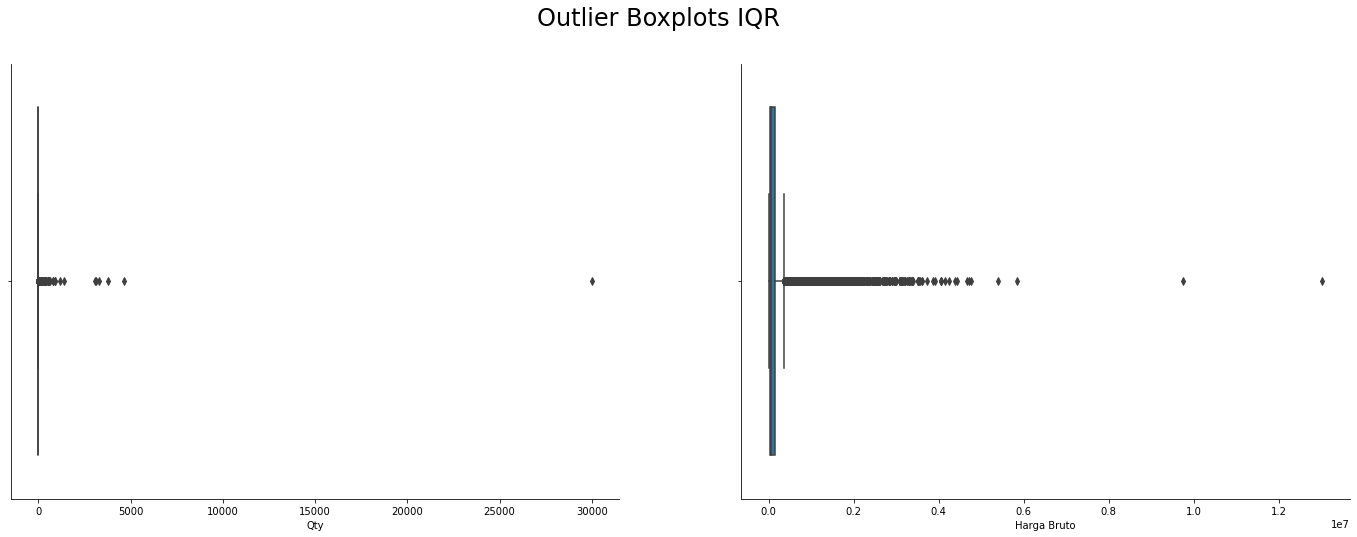

In [10]:
# Outlier Boxplots
fig, axes = plt.subplots(1,2, figsize=(24,8))
j = 0
for col in numcol:
    sns.boxplot(x=col, ax=axes[j], data=df)
    sns.despine()
    j += 1
        
fig.suptitle("Outlier Boxplots IQR", fontsize=24)

# Show boxplot
plt.savefig("Outlier Boxplots IQR.jpg")
plt.show()

In [11]:
df1 = df.copy()

In [12]:
#Checking skewness score of numeric variable to identify suitable transformation method
#closer to 0 the better

def skor_skew(df,x):
    print("Skor Skewness untuk data", x)
    print("Nilai untuk data asli: ", df[x].skew().round(2))
    print("Nilai setelah di transformasi dengan log: ", np.log(df[x]).skew().round(2))
    print("Nilai setelah di transformasi dengan square root: ", np.sqrt(df[x]).skew().round(2))
    print("Nilai setelah di transformasi dengan box cox: ", pd.Series(stats.boxcox(df[x])[0]).skew().round(2))
    print("Nilai setelah di transformasi dengan cubic root: ", np.cbrt(df[x]).skew().round(2))
    print("")

for i in numcol:
    skor_skew(df1, i)

#Error message means one of the transformation method is not compatible, just ignore it

Skor Skewness untuk data Qty
Nilai untuk data asli:  600.1
Nilai setelah di transformasi dengan log:  1.26
Nilai setelah di transformasi dengan square root:  51.79
Nilai setelah di transformasi dengan box cox:  679.23
Nilai setelah di transformasi dengan cubic root:  6.78

Skor Skewness untuk data Harga Bruto
Nilai untuk data asli:  4.73
Nilai setelah di transformasi dengan log:  nan
Nilai setelah di transformasi dengan square root:  1.5


C:\anaconda\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


ValueError: Data must be positive.

In [13]:
#transform the skewed numeric variablewith log transformation for Qty and sqrt transformation for Harga Bruto
df1["Qty Trans"] = np.log(df1["Qty"])
df1["Harga Bruto Trans"] = np.sqrt(df1["Harga Bruto"])
trans = ["Qty Trans", "Harga Bruto Trans"]

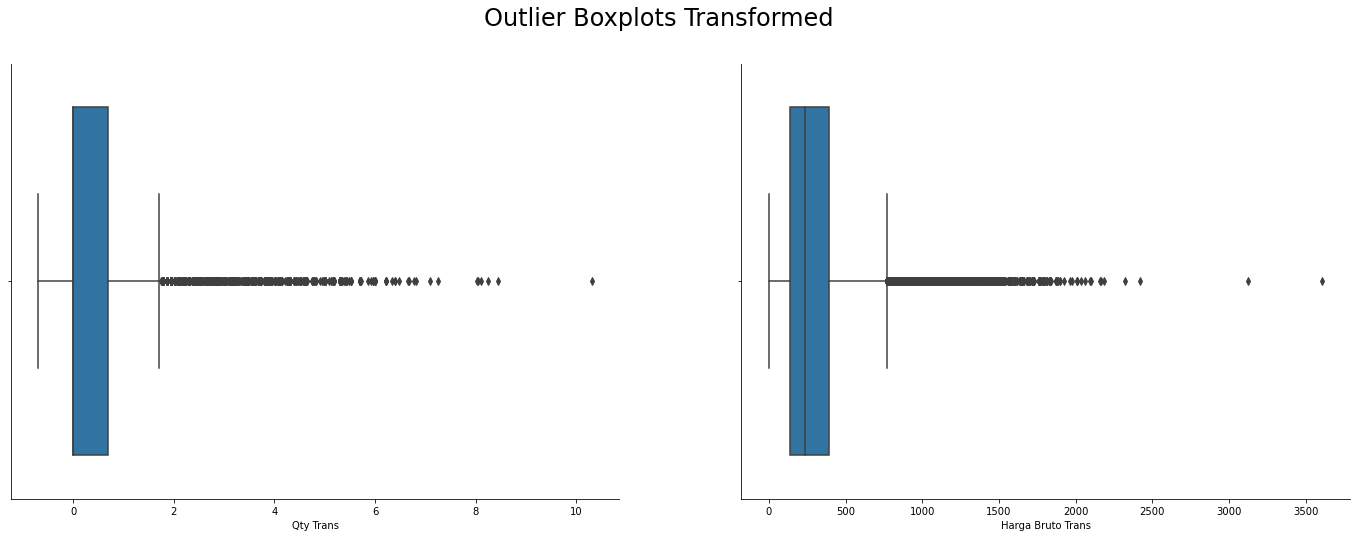

In [14]:
# Outlier Boxplots after transformation
fig, axes = plt.subplots(1,2, figsize=(24,8))
j = 0
for col in trans:
    sns.boxplot(x=col, ax=axes[j], data=df1)
    sns.despine()
    j += 1
        
fig.suptitle("Outlier Boxplots Transformed", fontsize=24)

# Show boxplot
plt.savefig("Outlier Boxplots Trans.jpg")
plt.show()

In [15]:
#outlier handling
def remove_outlier(df,outcol):
    q1=np.nanquantile(df[outcol],0.25)
    q3=np.nanquantile(df[outcol],0.75)
    iqr=q3-q1
    ll=q1-1.5*iqr
    ul=q3+1.5*iqr
    out=df[(df[outcol]<ll)|(df[outcol]>ul)].index
    return df.drop(index=out)

dfx=remove_outlier(df, "Qty")
dfx=remove_outlier(dfx, "Harga Bruto")
df1=remove_outlier(df1, "Qty Trans")
df1=remove_outlier(df1, "Harga Bruto Trans")

#Outlier handling
print("TANPA TRANSFORMASI")
print("Jumlah baris sebelum menghapus outlier: ", df.shape[0])
print("Jumlah baris setelah menghapus outlier: ", dfx.shape[0])
print("Persentase baris yang dibuang: ", (df.shape[0]-dfx.shape[0])/df.shape[0]*100, "%")
print("")

print("DENGAN TRANSFORMASI")
print("Jumlah baris sebelum menghapus outlier: ", df.shape[0])
print("Jumlah baris setelah menghapus outlier: ", df1.shape[0])
print("Persentase baris yang dibuang: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100, "%")

TANPA TRANSFORMASI
Jumlah baris sebelum menghapus outlier:  461365
Jumlah baris setelah menghapus outlier:  381692
Persentase baris yang dibuang:  17.268973589240623 %

DENGAN TRANSFORMASI
Jumlah baris sebelum menghapus outlier:  461365
Jumlah baris setelah menghapus outlier:  430158
Persentase baris yang dibuang:  6.764058825441895 %


In [16]:
#handling missing value
df1=df1.dropna()

In [17]:
df1.shape

(430151, 11)

In [18]:
#recheck...
df_summ(df1)

,Kolom,Tipe,Missing,Missing (%),Unik,Unik (%)
0,Gudang,object,0,0.0,4,0.000930
1,Kode Pelanggan,object,0,0.0,5704,1.326046
2,Kategori Pelanggan,object,0,0.0,5,0.001162
3,Kode Produk,object,0,0.0,4663,1.084038
4,Kategori Produk,object,0,0.0,167,0.038824
5,Tanggal,datetime64[ns],0,0.0,333,0.077415
6,No.Transaksi,object,0,0.0,91774,21.335299
7,Qty,float64,0,0.0,64,0.014878
8,Harga Bruto,float64,0,0.0,1269,0.295013
9,Qty Trans,float64,0,0.0,64,0.014878


In [19]:
df1["Kategori Pelanggan"].unique()

array(['GRO', 'UMUM', 'LGGN', 'HTRSTO', 'LGM'], dtype=object)

In [20]:
#replacing typo from Kategori Pelanggan LGM --> LGGN
df1["Kategori Pelanggan"].loc[(df1["Kategori Pelanggan"] == "LGM")] = "LGGN"

In [21]:
df1["Kategori Pelanggan"].unique()

array(['GRO', 'UMUM', 'LGGN', 'HTRSTO'], dtype=object)

In [22]:
df1["Gudang"].unique()

array(['GGS', 'GS', 'GHI', 'GHL'], dtype=object)

In [23]:
#replace typo Gudang GS --> GGS
df1["Gudang"].loc[(df1["Gudang"] == "GS")] = "GGS"

In [24]:
df1["Gudang"].unique()

array(['GGS', 'GHI', 'GHL'], dtype=object)

In [25]:
df_summ(df1)

,Kolom,Tipe,Missing,Missing (%),Unik,Unik (%)
0,Gudang,object,0,0.0,3,0.000697
1,Kode Pelanggan,object,0,0.0,5704,1.326046
2,Kategori Pelanggan,object,0,0.0,4,0.000930
3,Kode Produk,object,0,0.0,4663,1.084038
4,Kategori Produk,object,0,0.0,167,0.038824
5,Tanggal,datetime64[ns],0,0.0,333,0.077415
6,No.Transaksi,object,0,0.0,91774,21.335299
7,Qty,float64,0,0.0,64,0.014878
8,Harga Bruto,float64,0,0.0,1269,0.295013
9,Qty Trans,float64,0,0.0,64,0.014878


# Data Preprocessing

In [56]:
df2 = df1.copy()

In [57]:
#Prepare the RFM table

#total sum
df2["TotalSum"] = df2["Qty"] * df2["Harga Bruto"]

#recency variable
from datetime import timedelta
skrg = max(df2.Tanggal) + timedelta(days=1)

#aggregate the dataset by Kode Pelanggan (The RFM Table)
df2 = df2.groupby(["Kode Pelanggan"]).agg({
    "Tanggal": lambda x: (skrg - x.max()).days,
    "No.Transaksi": "count",
    "TotalSum": "sum"})

# Rename columns
df2.rename(columns = {"Tanggal": "Recency","No.Transaksi": "Frequency","TotalSum": "Monetary Value"}, inplace=True)

In [58]:
df2.describe()

,Recency,Frequency,Monetary Value
count,5704.000000,5704.000000,5.704000e+03
mean,149.655856,75.412167,1.009698e+07
std,116.243614,1795.936126,1.195079e+08
min,1.000000,1.000000,1.000000e+00
25%,45.000000,5.000000,3.314375e+05
50%,125.000000,11.000000,8.007500e+05
75%,243.000000,25.000000,2.013376e+06
max,395.000000,134572.000000,8.097713e+09


In [59]:
df2.sort_values("Frequency", ascending=False).head(7)

,Recency,Frequency,Monetary Value
Kode Pelanggan,,,
UMUM,1,134572,8.097713e+09
LGGN,1,6015,4.727206e+08
3170198,1,5198,1.440260e+09
3171397,1,4646,2.582268e+08
3170195,5,4507,1.096432e+09
3170193,4,3393,8.879778e+08
3171207,1,3281,4.308133e+08


In [60]:
df2.sort_values("Monetary Value", ascending=False).head(7)

,Recency,Frequency,Monetary Value
Kode Pelanggan,,,
UMUM,1,134572,8.097713e+09
3170197,3,2960,1.597961e+09
3170198,1,5198,1.440260e+09
3170192,3,2846,1.100721e+09
3170195,5,4507,1.096432e+09
3170200,3,2278,9.720359e+08
3170193,4,3393,8.879778e+08


In [61]:
#because customer with Kode Pelanggan = UMUM is the accumulated of non-coded customers (general customers),
#the frequency and Monetary Value gets too big and becoming irrelevant (accumulation of different common customers)
#thus we will drop it
df2 = df2.drop(index="UMUM")

C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

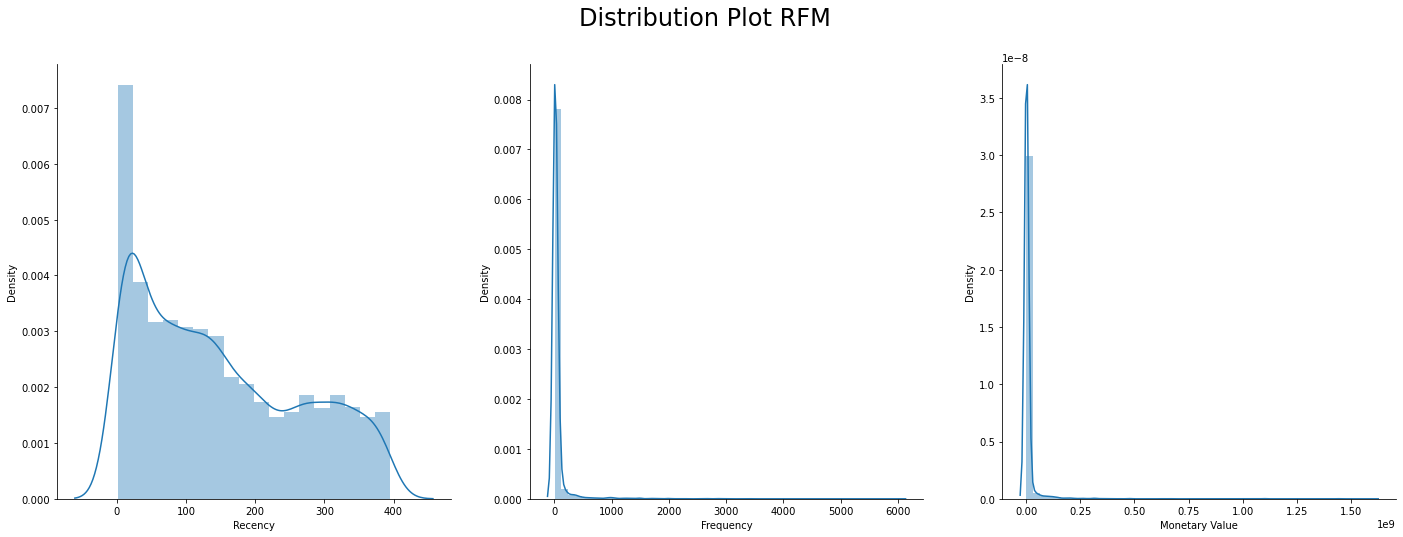

In [62]:
#check data distribution plot
fig, axes = plt.subplots(1,3, figsize=(24,8))
j = 0
for col in df2.columns:
    sns.distplot(x=df2[col], ax=axes[j])
    sns.despine()
    axes[j].set_xlabel(col)
    j += 1
        
fig.suptitle("Distribution Plot RFM", fontsize=24)

# Show dist plot
plt.savefig("Distplot RFM awal.jpg")
plt.show()

In [63]:
for i in df2.columns:
    skor_skew(df2, i)

Skor Skewness untuk data Recency
Nilai untuk data asli:  0.5
Nilai setelah di transformasi dengan log:  -1.19
Nilai setelah di transformasi dengan square root:  -0.11
Nilai setelah di transformasi dengan box cox:  -0.22
Nilai setelah di transformasi dengan cubic root:  -0.4

Skor Skewness untuk data Frequency
Nilai untuk data asli:  12.61
Nilai setelah di transformasi dengan log:  0.93
Nilai setelah di transformasi dengan square root:  5.22
Nilai setelah di transformasi dengan box cox:  -0.02
Nilai setelah di transformasi dengan cubic root:  3.44

Skor Skewness untuk data Monetary Value
Nilai untuk data asli:  16.38
Nilai setelah di transformasi dengan log:  0.6
Nilai setelah di transformasi dengan square root:  6.05
Nilai setelah di transformasi dengan box cox:  -0.15
Nilai setelah di transformasi dengan cubic root:  3.82



In [64]:
df3 = df2.copy()

#transformasi variabel Recency dengan metode sqrt
df3["Recency"] = np.sqrt(df3["Recency"])

#transformasi variabel Frequency dengan metode box cox
df3["Frequency"] = stats.boxcox(df3["Frequency"])[0]

#transformasi variabel Monetary Value dengan metode box cox
df3["Monetary Value"] = stats.boxcox(df3["Monetary Value"])[0]

df3.describe()

,Recency,Frequency,Monetary Value
count,5703.000000,5703.000000,5703.000000
mean,11.042396,1.928730,9.802716
std,5.268043,0.770198,0.830680
min,1.000000,0.000000,0.000000
25%,6.708204,1.386737,9.316838
50%,11.180340,1.926163,9.763730
75%,15.588457,2.408279,10.209537
max,19.874607,4.257069,12.875721


C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

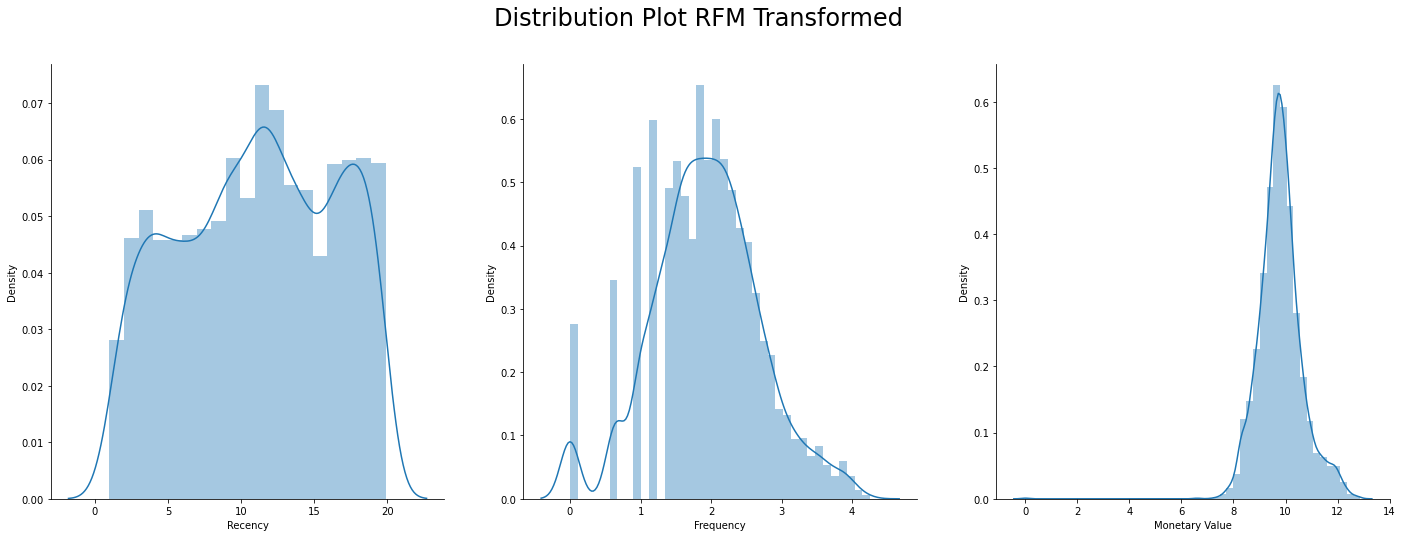

In [65]:
#recheck distribution after transform
fig, axes = plt.subplots(1,3, figsize=(24,8))
j = 0
for col in df3.columns:
    sns.distplot(x=df3[col], ax=axes[j])
    sns.despine()
    axes[j].set_xlabel(col)
    j += 1
        
fig.suptitle("Distribution Plot RFM Transformed", fontsize=24)

# Show dist plot
plt.savefig("Distplot RFM Transformed.jpg")
plt.show()

In [66]:
#Normalize data with standardization
scaler = StandardScaler()
fix = scaler.fit_transform(df3)

#check that mean=0 & std=1, thus it is standard normal distribution
df_fix = pd.DataFrame(fix, columns=["Recency","Frequency","Monetary Value"])
df_fix = df_fix.set_index(df3.index)
df_fix.describe()

,Recency,Frequency,Monetary Value
count,5.703000e+03,5.703000e+03,5.703000e+03
mean,2.714077e-16,4.484883e-15,-1.054469e-15
std,1.000088e+00,1.000088e+00,1.000088e+00
min,-1.906453e+00,-2.504418e+00,-1.180187e+01
25%,-8.228050e-01,-7.037666e-01,-5.849669e-01
50%,2.618732e-02,-3.332889e-03,-4.693719e-02
75%,8.630263e-01,6.226849e-01,4.897866e-01
max,1.676711e+00,3.023304e+00,3.699708e+00


In [67]:
df_fix.head()

,Recency,Frequency,Monetary Value
Kode Pelanggan,,,
1170173,1.628645,0.067733,-0.208140
1170241,0.443599,0.132079,-0.997444
1170254,1.460366,-0.273675,-0.551777
1170363,1.609244,-0.703767,-1.522701
1170391,1.540526,-0.532356,-0.857232


In [68]:
#export dataframe final to excel for visualization and descriptive statistics input
df_fix.to_excel("final.xlsx")

In [78]:
#export dataframe final to excel for visualization and descriptive statistics input
df2.to_excel("dataset visualisasi.xlsx")

# Data Modelling

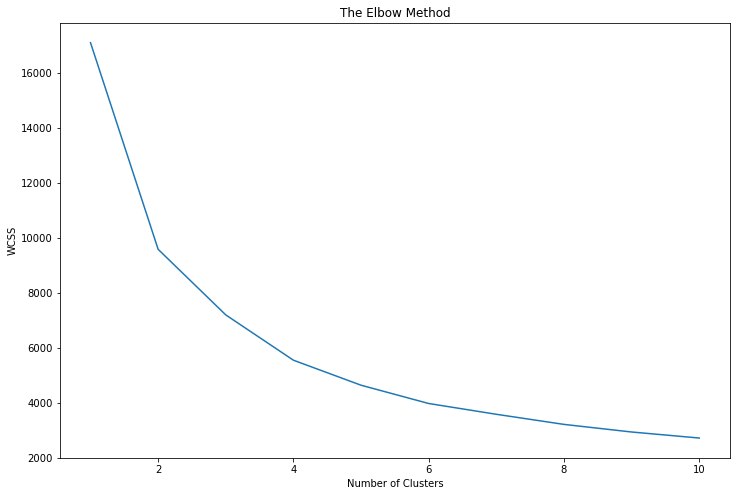

In [70]:
#determining the cluster number with elbow method
fig, ax = plt.subplots(figsize=(12,8))

#WCSS is the sum of squared distance between each point and the centroid in a cluster
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(fix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

# Visualize elbow method
plt.savefig("Elbow Method.jpg")
plt.show()

In [71]:
#determining the cluster number with Silhouette method
for i in range(2,11):
    model = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    preds = model.fit_predict(fix)
    centers = model.cluster_centers_

    score = silhouette_score(fix, preds).round(3)
    print("Untuk k={}, silhouette score= {}".format(i, score))

Untuk k=2, silhouette score= 0.371
Untuk k=3, silhouette score= 0.319
Untuk k=4, silhouette score= 0.313
Untuk k=5, silhouette score= 0.307
Untuk k=6, silhouette score= 0.303
Untuk k=7, silhouette score= 0.29
Untuk k=8, silhouette score= 0.294
Untuk k=9, silhouette score= 0.293
Untuk k=10, silhouette score= 0.292


In [72]:
#first we choose k=3
model = KMeans(n_clusters=3, random_state=42).fit(fix)
labels = model.labels_
df2["Cluster"]=labels
df_fix["Cluster"]=labels

In [73]:
#show the statistic profile (mean) from each cluster
df2.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary Value':['mean', 'count']}).round(2)

Recency Frequency Monetary Value      
           mean      mean           mean count
Cluster                                       
0         31.62    281.80    53619388.36   828
1        239.85      5.30      356178.51  2142
2        114.78     18.62     1586414.64  2733

In [74]:
#Take aways:
#Cluster 0: Highest freq and spending, with the lowest recency (most recent last transactions)
#Cluster 1: Lowest freq and spending, highest recency (oldest last transactions)
#Cluster 2: Intermediate (just between the 0 and 1 cluster)

#Business implications:
#Cluster 0 = Loyal Customer --> give upmost priority and special treatment, avoid churn at every cost
#Cluster 1 = Lost Customer / Bypasser --> They only transact every once in a while, no need to spend resource for this cluster
#Cluster 2 = Opportunity --> Design marketing strategies to increase their value to the supermarket

In [79]:
#export dataframe to excel for implementation
df2.to_excel("Hasil Clustering.xlsx")

# Visualisasi Hasil Clustering

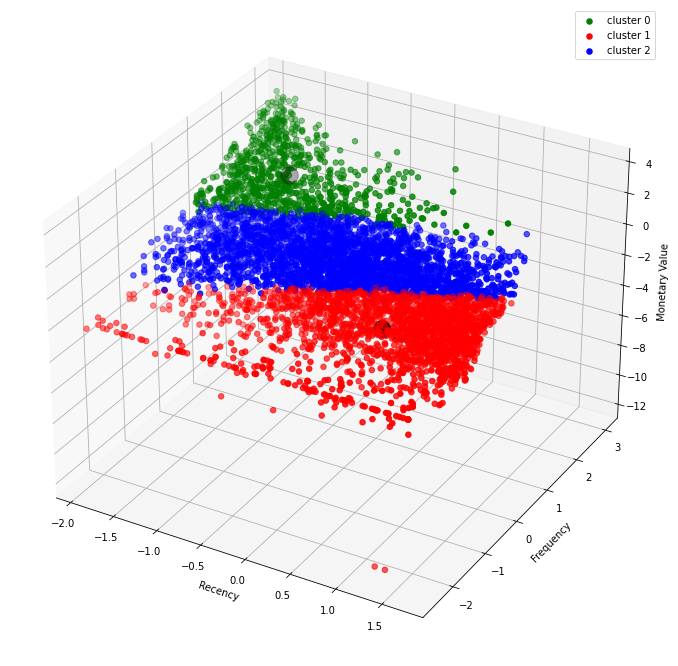

In [75]:
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111, projection='3d')

x=fix
y_clusters=labels

ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 30 , color = 'green', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 30 , color = 'red', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 30 , color = 'blue', label = "cluster 2")

center = model.cluster_centers_
ax.scatter(center[:,0], center[:,1],center[:,2],marker="o", c="black", s=300)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.legend()

plt.savefig("Hasil Clustering.jpg")
plt.show()